##### This project explores the Iris dataset using various data science techniques, including data visualization, clustering, classification, and regression.

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

#Loading the Dataset

Loading the dataset and inspecting the first 10 rows

In [5]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.data', names = column_names)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#Exploratory Data Analysis (EDA)

###Scatter Plot

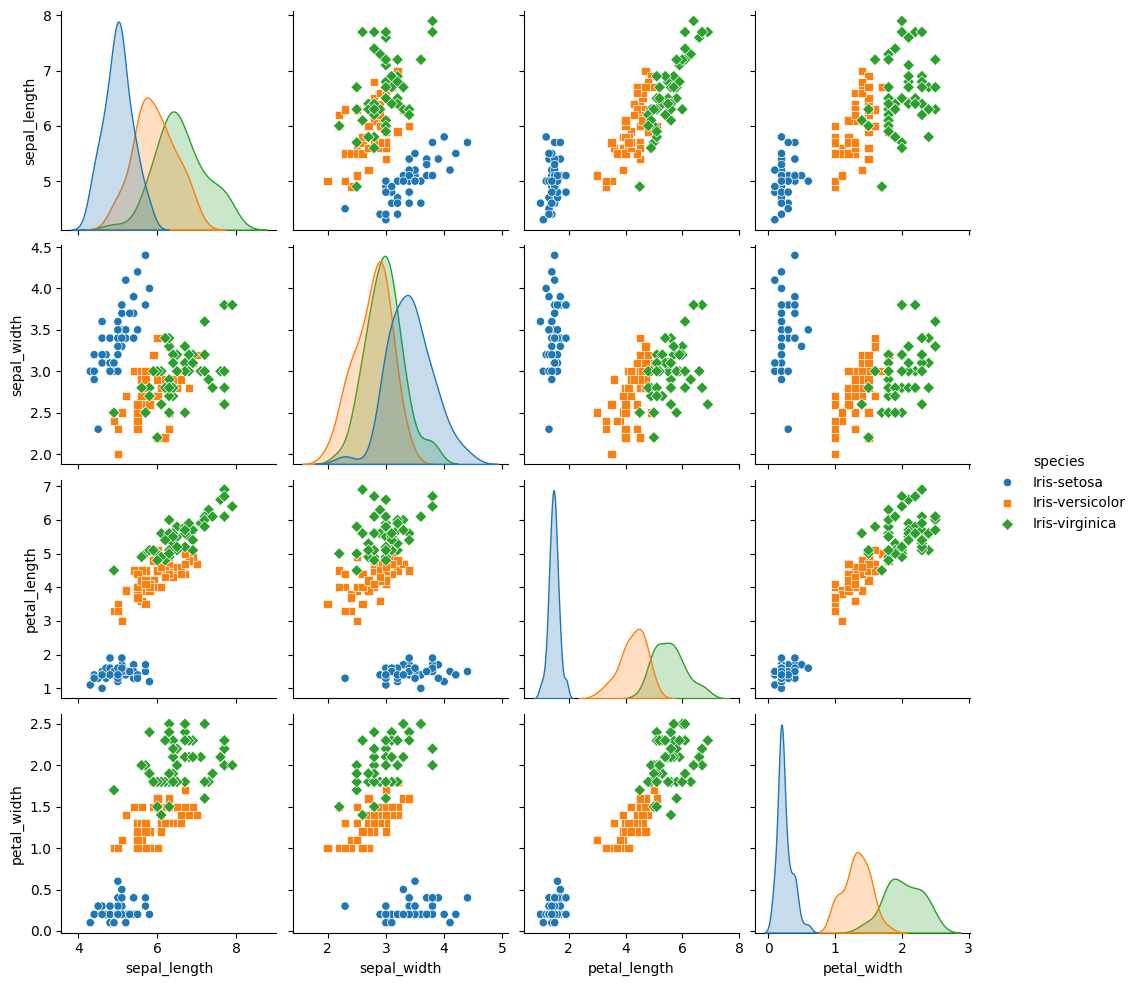

In [6]:
sns.pairplot(df, hue='species', markers=['o','s','D'])
plt.show()

###Box Plot

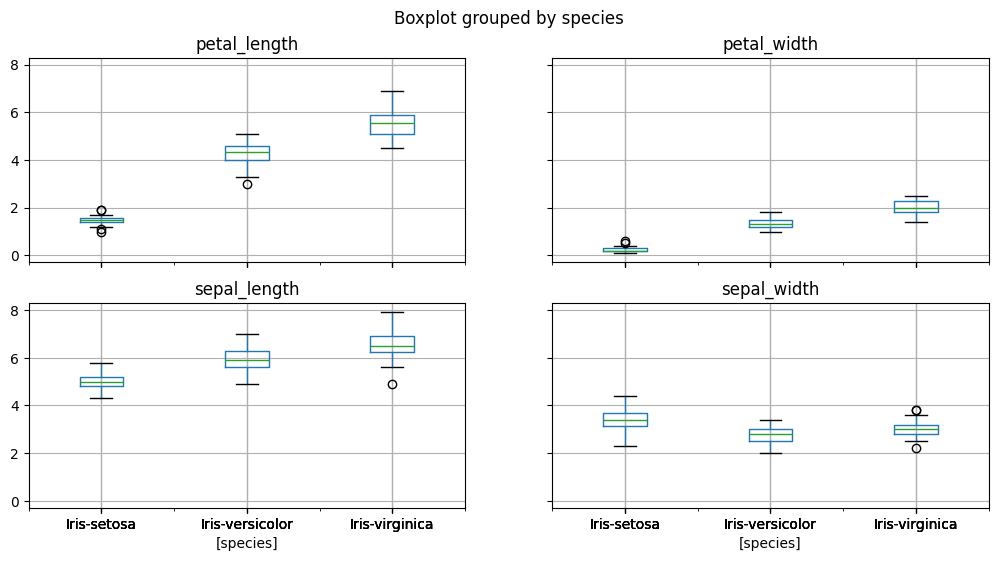

In [7]:
df.boxplot(by='species', figsize=(12, 6))
plt.show()

###Histogram

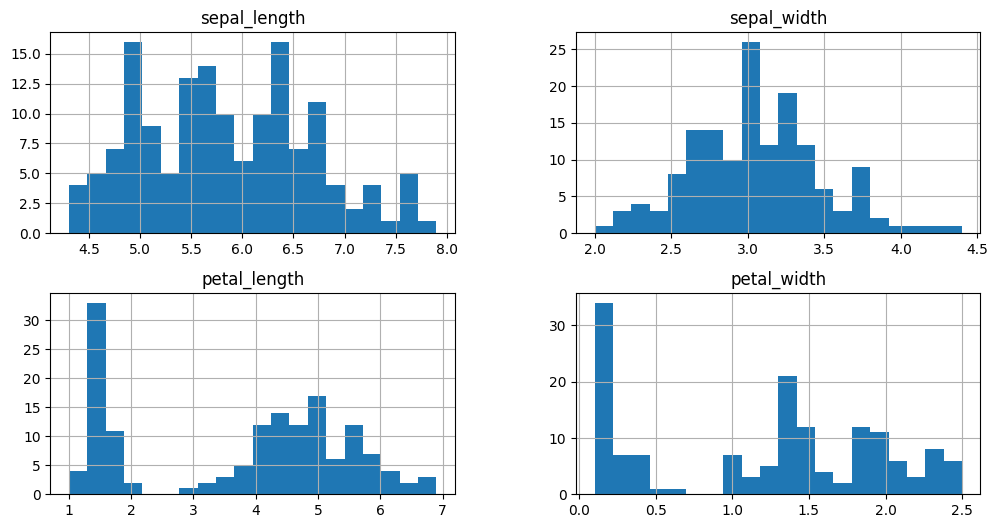

In [8]:
df.hist(figsize=(12,6), bins=20)
plt.show()

#KMeans - Clustering

Grouping the flowers through KMeans clustering

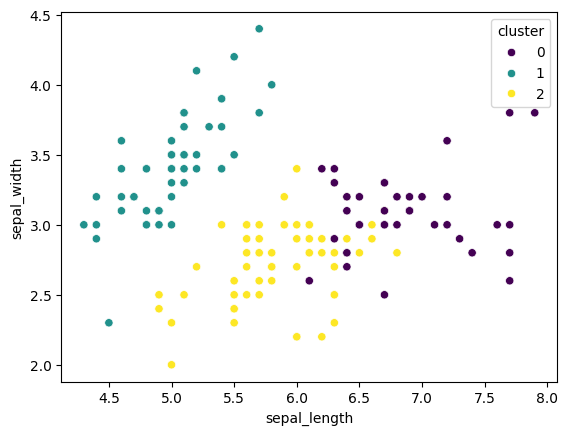

In [9]:
x = df.drop(columns = ['species'])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(x)
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['cluster'], palette= 'viridis')
plt.show()

#Classification - Linear Discriminant Analysis (LDA)

Classifying the iris species.

In [10]:
x = df.drop(columns = ['species', 'cluster'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LDA Classfication Accuracy: {accuracy:.2f}')

LDA Classfication Accuracy: 1.00


#Linear Regression

Applying linear regression to predict petal width based on other features.

In [11]:
x = df[['sepal_length', 'sepal_width', 'petal_length']]
y = df['petal_width']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE:", mse)

Linear Regression MSE: 0.04643810173004898
